In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df= pd.read_csv("bfi.csv")
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [42]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [43]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [44]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086889, 0.0)

In [45]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.8485397221949231

In [46]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

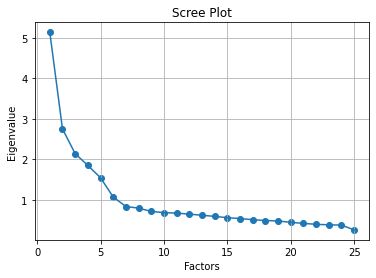

In [47]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [63]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 0.10820908,  0.03450424,  0.05998223, -0.53815203, -0.00109809,
         0.17202918],
       [ 0.01870004,  0.20032582,  0.1144668 ,  0.67006474,  0.09285737,
         0.03405657],
       [-0.02543102,  0.28362229,  0.09858305,  0.61030259,  0.16280421,
         0.19276484],
       [-0.07915476,  0.19066758,  0.21869309,  0.40890588, -0.03339059,
         0.19619149],
       [-0.16450712,  0.34944396,  0.08854052,  0.46718779,  0.19843636,
         0.26397343],
       [-0.01871858,  0.03709083,  0.55550628,  0.02404107,  0.22355759,
         0.01223263],
       [ 0.05796093, -0.01134986,  0.66890233,  0.07455181,  0.16508082,
         0.11477495],
       [-0.03772943,  0.01676874,  0.54810731,  0.11757151, -0.0021191 ,
         0.04482805],
       [ 0.20889017, -0.10317696, -0.64715597, -0.14088094,  0.04693938,
         0.29973376],
       [ 0.26872013, -0.1987149 , -0.54993671, -0.08829281,  0.08872822,
         0.05841816],
       [ 0.01283913, -0.59875075,  0.04326259, -0.

In [61]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 1.13279565e-01,  1.66115774e-02,  3.88431318e-02,
        -4.34111840e-01, -5.53170823e-02],
       [ 2.69940447e-02,  2.47674339e-01,  1.19369009e-01,
         6.21029368e-01,  3.12964383e-02],
       [ 6.79340718e-03,  3.54479678e-01,  8.99257309e-02,
         6.36913488e-01,  2.47535526e-02],
       [-6.40931892e-02,  2.27365908e-01,  2.12868433e-01,
         4.25615532e-01, -1.40712958e-01],
       [-1.24728375e-01,  4.22972356e-01,  7.45750642e-02,
         5.18305677e-01,  3.65292580e-02],
       [ 2.36386082e-03,  6.43039889e-02,  5.51074571e-01,
         6.49697746e-02,  1.91564267e-01],
       [ 8.40133307e-02,  3.04843508e-02,  6.49323443e-01,
         1.30889127e-01,  9.12605171e-02],
       [-3.25276728e-02,  2.29140363e-02,  5.53091195e-01,
         1.30050246e-01, -2.93989799e-02],
       [ 2.46115102e-01, -5.77783306e-02, -6.33026507e-01,
        -6.32765294e-02, -8.16108427e-02],
       [ 2.91684665e-01, -1.70261027e-01, -5.59471201e-01,
        -5.79658933e-02

In [62]:
var = fa.get_factor_variance()
# 特征值
# 方差贡献率
# 累计方差贡献率
var

(array([2.72395317, 2.5782827 , 2.04013854, 1.79108478, 1.47258211]),
 array([0.08786946, 0.08317041, 0.06581092, 0.05777693, 0.04750265]),
 array([0.08786946, 0.17103987, 0.23685079, 0.29462772, 0.34213036]))